# Chapter 4

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data prep
from urllib.request import urlretrieve
file = 'NOAA_QCLCD_2011_hourly_13904.txt'
url = 'https://assets.datacamp.com/production/course_1639/datasets/' + file
urlretrieve(url, file)

('NOAA_QCLCD_2011_hourly_13904.txt', <http.client.HTTPMessage at 0x10d4941d0>)

In [4]:
# Import pandas
import pandas as pd

# Read in the data file: df
df = pd.read_csv(file)

# Print the output of df.head()
print(df.head())

# Read in the data file with header=None: df_headers
df_headers = pd.read_csv(file, header=None)

# Print the output of df_headers.head()
print(df_headers.head())


   13904  20110101  0053  12  OVC045     10.00  .1  .2  .3 ...   .18  .19  \
0  13904  20110101   153  12  OVC049     10.00             ...              
1  13904  20110101   253  12  OVC060     10.00             ...   030        
2  13904  20110101   353  12  OVC065     10.00             ...              
3  13904  20110101   453  12  BKN070     10.00             ...              
4  13904  20110101   553  12  BKN065     10.00             ...   015        

   29.95  .20  AA  .21  .22  .23 29.95.1  .24  
0  30.01       AA                  30.02       
1  30.01       AA                  30.02       
2  30.03       AA                  30.04       
3  30.04       AA                  30.04       
4  30.06       AA                  30.06       

[5 rows x 44 columns]
      0         1    2   3       4  5      6  7  8  9  ...   34 35     36 37  \
0  13904  20110101   53  12  OVC045     10.00          ...          29.95      
1  13904  20110101  153  12  OVC049     10.00          ...        

In [5]:
# data prep
column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'
list_to_drop = ['sky_conditionFlag',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_farenFlag',
 'dry_bulb_celFlag',
 'wet_bulb_farenFlag',
 'wet_bulb_celFlag',
 'dew_point_farenFlag',
 'dew_point_celFlag',
 'relative_humidityFlag',
 'wind_speedFlag',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressureFlag',
 'pressure_tendencyFlag',
 'pressure_tendency',
 'presschange',
 'presschangeFlag',
 'sea_level_pressureFlag',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'record_type',
 'altimeterFlag',
 'junk']

In [9]:
# Split on the comma to create a list: column_labels_list
column_labels_list = column_labels.split(',')

# Assign the new column labels to the DataFrame: df.columns
df.columns = column_labels_list

# Remove the appropriate columns: df_dropped
df_dropped = df.drop(list_to_drop, axis='columns')

# Print the output of df_dropped.head()
print(df_dropped.head())


    Wban      date  Time  StationType sky_condition visibility dry_bulb_faren  \
0  13904  20110101   153           12        OVC049      10.00             51   
1  13904  20110101   253           12        OVC060      10.00             51   
2  13904  20110101   353           12        OVC065      10.00             50   
3  13904  20110101   453           12        BKN070      10.00             50   
4  13904  20110101   553           12        BKN065      10.00             49   

  dry_bulb_cel wet_bulb_faren wet_bulb_cel dew_point_faren dew_point_cel  \
0         10.6             37          3.0              14         -10.0   
1         10.6             37          2.9              13         -10.6   
2         10.0             38          3.1              17          -8.3   
3         10.0             37          2.8              15          -9.4   
4          9.4             37          2.8              17          -8.3   

  relative_humidity wind_speed wind_direction station_pr

In [13]:
# Convert the date column to string: df_dropped['date']
df_dropped['date'] = df_dropped.date.astype(str)

# Pad leading zeros to the Time column: df_dropped['Time']
# '{:}' is an advanced format string, PEP 3101
df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))

# Concatenate the new date and Time columns: date_string
date_string = df_dropped['date'] + df_dropped['Time']

# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

# Set the index to be the new date_times container: df_clean
df_clean = df_dropped.set_index(date_times)

# Print the output of df_clean.head()
print(df_clean.head())

                      Wban      date  Time  StationType sky_condition  \
2011-01-01 01:53:00  13904  20110101  0153           12        OVC049   
2011-01-01 02:53:00  13904  20110101  0253           12        OVC060   
2011-01-01 03:53:00  13904  20110101  0353           12        OVC065   
2011-01-01 04:53:00  13904  20110101  0453           12        BKN070   
2011-01-01 05:53:00  13904  20110101  0553           12        BKN065   

                    visibility dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 01:53:00      10.00             51         10.6             37   
2011-01-01 02:53:00      10.00             51         10.6             37   
2011-01-01 03:53:00      10.00             50         10.0             38   
2011-01-01 04:53:00      10.00             50         10.0             37   
2011-01-01 05:53:00      10.00             49          9.4             37   

                    wet_bulb_cel dew_point_faren dew_point_cel  \
2011-01-01 01:53:00          3.0

In [23]:
# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-Jun-20 8am':'2011-Jun-20 8am', 'dry_bulb_faren'])

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64


In [24]:
# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')

# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-Jun-20 8am':'2011-Jun-20 8am', 'dry_bulb_faren'])

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64


In [25]:
# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')

In [26]:
# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['June 20, 2011 8 AM':'June 20, 2011 8 AM', 'dry_bulb_faren'])

# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')

# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-Jun-20 8am':'2011-Jun-20 8am', 'dry_bulb_faren'])

# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64
2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64


## Statistical Exploratory Data Analysis

In [29]:
# Print the median of the dry_bulb_faren column
print(df_clean.dry_bulb_faren.median())

# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the month of January
print(df_clean.loc['2011-Jan':'2011-Jan', 'dry_bulb_faren'].median())

72.0
78.0
48.0


In [35]:
# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean.resample('D').mean()
print(daily_mean_2011.loc['2011-01-01', 'dry_bulb_faren'])
print(df_clean.loc['2011-01-01', 'dry_bulb_faren'].describe())

50.130434782608695
count    23.000000
mean     50.130435
std       6.510860
min      38.000000
25%      47.500000
50%      50.000000
75%      55.500000
max      59.000000
Name: dry_bulb_faren, dtype: float64


In [38]:
# Data prep
from urllib.request import urlretrieve
file = 'weather_data_austin_2010.csv'
url = 'https://assets.datacamp.com/production/course_1639/datasets/' + file
urlretrieve(url, file)

# Load file, but use date string to create a time series
df_austin = pd.read_csv(file, parse_dates=True, index_col = 'Date')
df_climate = df_austin
print(df_climate.shape)

(8759, 3)


In [42]:
# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_climate.resample('D').mean()

# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index().loc[:, 'Temperature']

print(daily_temp_climate.head(10))

0    49.337500
1    49.795833
2    49.900000
3    49.729167
4    49.841667
5    49.679167
6    49.491667
7    49.366667
8    49.354167
9    49.354167
Name: Temperature, dtype: float64


In [43]:
# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean.resample('D').mean()

# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011.dry_bulb_faren.values

# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_climate.resample('D').mean()

# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index().loc[:, 'Temperature']

# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())


1.330083921569873


In [55]:
# Select days that are sunny: sunny
sunny = df_clean.loc[df_clean['sky_condition'] == 'CLR']
print(sunny.describe())

# Select days that are overcast: overcast
overcast = df_clean.loc[df_clean['sky_condition'].str.contains('OVC')]
print(overcast.describe())

          Wban  StationType  dry_bulb_faren  dew_point_faren   wind_speed
count   2349.0       2349.0     2349.000000      2349.000000  2346.000000
mean   13904.0         12.0       64.084291        47.097063     6.705030
std        0.0          0.0       18.894188        16.823488     5.805882
min    13904.0         12.0       18.000000         8.000000     0.000000
25%    13904.0         12.0       50.000000        34.000000     0.000000
50%    13904.0         12.0       66.000000        46.000000     6.000000
75%    13904.0         12.0       80.000000        63.000000    10.000000
max    13904.0         12.0      104.000000        75.000000    28.000000
          Wban  StationType  dry_bulb_faren  dew_point_faren   wind_speed
count   2757.0       2757.0     2755.000000      2753.000000  2757.000000
mean   13904.0         12.0       60.612704        54.460952     9.943779
std        0.0          0.0       13.749705        14.384919     5.446677
min    13904.0         12.0       19.0

In [56]:
# Select days that are sunny: sunny
sunny = df_clean.loc[df_clean['sky_condition'] == 'CLR']

# Select days that are overcast: overcast
overcast = df_clean.loc[df_clean['sky_condition'].str.contains('OVC')]

# Resample sunny and overcast, aggregating by maximum daily temperature
sunny_daily_max = sunny.resample('D').max()
overcast_daily_max = overcast.resample('D').max()

# Print the difference between the mean of sunny_daily_max and overcast_daily_max
print(sunny_daily_max.mean() - overcast_daily_max.mean())


Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


## Visual Exploratory Data Analysis

In [71]:
# data prep
# Turn our visibility column into a numeric from a string
df_clean.visibility = pd.to_numeric(df_clean.visibility, errors='coerce')

# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = df_clean.loc[:,['visibility', 'dry_bulb_faren']].resample('W').mean()
weekly_mean

,visibility,dry_bulb_faren
2011-01-02,10.000000,44.659574
2011-01-09,8.275785,50.246637
2011-01-16,6.451651,41.103774
2011-01-23,8.370853,47.194313
2011-01-30,9.966851,53.486188
2011-02-06,9.242647,38.235294
2011-02-13,9.281768,40.082873
2011-02-20,8.711134,65.100840
2011-02-27,8.154206,64.976636
2011-03-06,9.795580,57.707182


                visibility  dry_bulb_faren
visibility         1.00000         0.49004
dry_bulb_faren     0.49004         1.00000


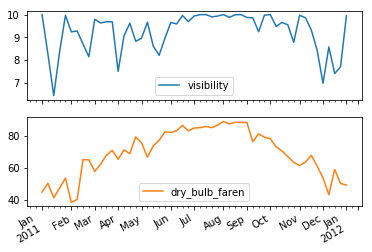

In [72]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = df_clean.loc[:, ['visibility', 'dry_bulb_faren']].resample('W').mean()

# Print the output of weekly_mean.corr()
print(weekly_mean.corr())

# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots = True)
plt.show()


In [63]:
df_clean['visibility']

2011-01-01 01:53:00    10.00
2011-01-01 02:53:00    10.00
2011-01-01 03:53:00    10.00
2011-01-01 04:53:00    10.00
2011-01-01 05:53:00    10.00
2011-01-01 06:53:00    10.00
2011-01-01 07:53:00    10.00
2011-01-01 08:53:00    10.00
2011-01-01 09:53:00    10.00
2011-01-01 10:53:00    10.00
2011-01-01 11:53:00    10.00
2011-01-01 12:53:00    10.00
2011-01-01 13:53:00    10.00
2011-01-01 14:53:00    10.00
2011-01-01 15:53:00    10.00
2011-01-01 16:53:00    10.00
2011-01-01 17:53:00    10.00
2011-01-01 18:53:00    10.00
2011-01-01 19:53:00    10.00
2011-01-01 20:53:00    10.00
2011-01-01 21:53:00    10.00
2011-01-01 22:53:00    10.00
2011-01-01 23:53:00    10.00
2011-01-02 00:53:00    10.00
2011-01-02 01:53:00    10.00
2011-01-02 02:53:00    10.00
2011-01-02 03:53:00    10.00
2011-01-02 04:53:00    10.00
2011-01-02 05:53:00    10.00
2011-01-02 06:53:00    10.00
                       ...  
2011-12-30 18:53:00    10.00
2011-12-30 19:53:00    10.00
2011-12-30 20:53:00    10.00
2011-12-30 21:

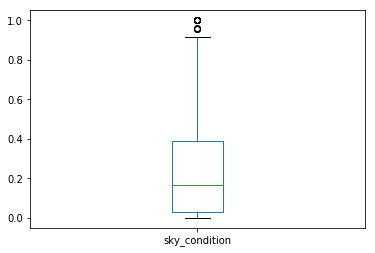

In [73]:
# Create a Boolean Series for sunny days: sunny
sunny = df_clean['sky_condition'] == 'CLR'

# Resample the Boolean Series by day and compute the sum: sunny_hours
sunny_hours = sunny.resample('D').sum()

# Resample the Boolean Series by day and compute the count: total_hours
total_hours = sunny.resample('D').count()

# Divide sunny_hours by total_hours: sunny_fraction
sunny_fraction = sunny_hours / total_hours

# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box')
plt.show()

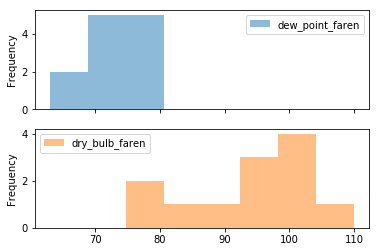

In [74]:
# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = df_clean.loc[:, ['dew_point_faren', 'dry_bulb_faren']].resample('M').max()

# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot(kind='hist', bins=8, alpha=0.5, subplots=True)

# Show the plot
plt.show()

In [86]:
# Extract the maximum temperature in August 2010 from df_climate: august_max
august_max = df_climate.loc['2010-09', 'Temperature'].max()
print(august_max)

92.7


In [113]:
# Resample the August 2011 temperatures in df_clean by day and aggregate the maximum value: august_2011
august_2011 = df_clean.loc['2011-09', 'dry_bulb_faren'].resample('D').max()

print(august_2011)
print(august_2011.dtypes)
print(august_2011.shape)
print(august_2011 <= august_max)
print(august_2011[august_2011 <= august_max])

2011-09-01     99.0
2011-09-02    101.0
2011-09-03    102.0
2011-09-04    101.0
2011-09-05     90.0
2011-09-06     92.0
2011-09-07     95.0
2011-09-08     93.0
2011-09-09     96.0
2011-09-10     98.0
2011-09-11    101.0
2011-09-12    102.0
2011-09-13    102.0
2011-09-14    100.0
2011-09-15     94.0
2011-09-16     89.0
2011-09-17     90.0
2011-09-18     94.0
2011-09-19     94.0
2011-09-20     94.0
2011-09-21     95.0
2011-09-22     93.0
2011-09-23     89.0
2011-09-24     97.0
2011-09-25    102.0
2011-09-26    102.0
2011-09-27     95.0
2011-09-28     99.0
2011-09-29     98.0
2011-09-30     90.0
Freq: D, Name: dry_bulb_faren, dtype: float64
float64
(30,)
2011-09-01    False
2011-09-02    False
2011-09-03    False
2011-09-04    False
2011-09-05     True
2011-09-06     True
2011-09-07     True
2011-09-08     True
2011-09-09    False
2011-09-10    False
2011-09-11    False
2011-09-12    False
2011-09-13    False
2011-09-14    False
2011-09-15     True
2011-09-16     True
2011-09-17     True


In [110]:
# Filter out days in august_2011 where the value exceeded august_max: august_2011_high
print(august_2011 <= august_max)

august_2011_high = august_2011[august_2011 <= august_max]

2011-09-01    False
2011-09-02    False
2011-09-03    False
2011-09-04    False
2011-09-05     True
2011-09-06     True
2011-09-07    False
2011-09-08    False
2011-09-09    False
2011-09-10    False
2011-09-11    False
2011-09-12    False
2011-09-13    False
2011-09-14    False
2011-09-15    False
2011-09-16     True
2011-09-17     True
2011-09-18    False
2011-09-19    False
2011-09-20    False
2011-09-21    False
2011-09-22    False
2011-09-23     True
2011-09-24    False
2011-09-25    False
2011-09-26    False
2011-09-27    False
2011-09-28    False
2011-09-29    False
2011-09-30     True
Freq: D, Name: dry_bulb_faren, dtype: bool


95.3


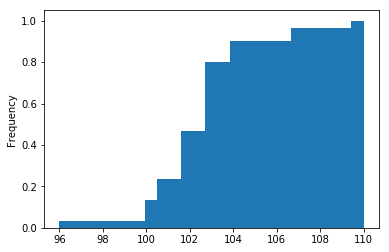

In [120]:
# Extract the maximum temperature in August 2010 from df_climate: august_max
august_max = df_climate.loc['2010-Aug', 'Temperature'].max()
print(august_max)

# Resample the August 2011 temperatures in df_clean by day and aggregate the maximum value: august_2011
august_2011 = df_clean.loc['2011-Aug', 'dry_bulb_faren'].resample('D').max()

# Filter out days in august_2011 where the value exceeded august_max: august_2011_high
# Strange wording - I would say select the days exceeding: Filter out means remove!
august_2011_high = august_2011[august_2011 > august_max]

# Construct a CDF of august_2011_high
august_2011_high.plot(kind='hist', bins=25, normed=True, cumulative=True)

# Display the plot
plt.show()


In [117]:
df_climate.loc['2010-Aug', 'Temperature'].max()

95.3

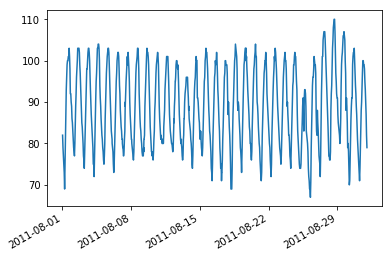

In [118]:
df_clean.loc['2011-Aug', 'dry_bulb_faren'].plot()
plt.show()

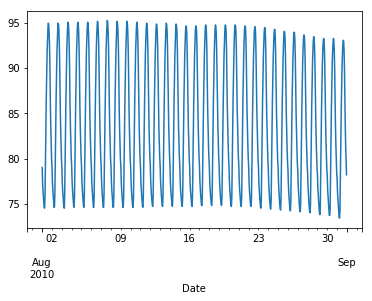

In [119]:
df_climate.loc['2010-Aug', 'Temperature'].plot()
plt.show()